In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#importing dataset or dataset
file_path = r'/content/Advertising.csv'
ds = pd.read_csv(file_path)
ds.head() #the first few rows of the dataset

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
#data exploration and cleaning
ds.info()
ds.isnull().sum() #missimg values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
ds=ds.dropna()
print("\nAfter dropping missing values:")



After dropping missing values:


In [ ]:
ds.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
ds.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


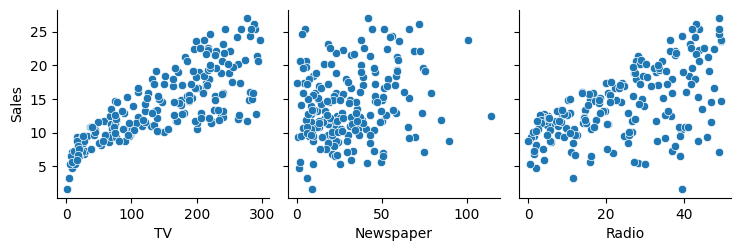

In [ ]:
#scatter plot
sns.pairplot(ds,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',kind='scatter')
plt.show()

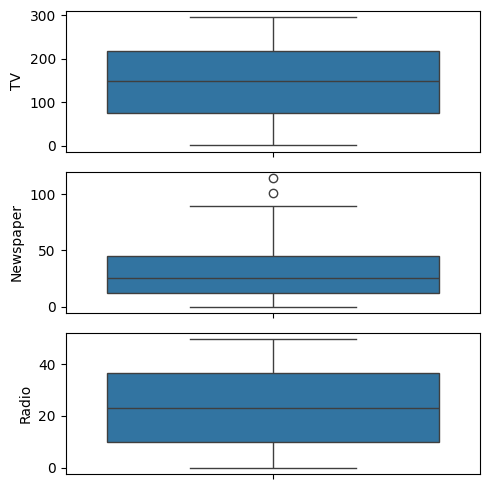

In [ ]:
#checking for outliers
fig, axs =plt.subplots(3, figsize=(5,5))
plt1 = sns.boxplot(ds['TV'], ax=axs[0])
plt1 = sns.boxplot(ds['Newspaper'], ax=axs[1])
plt1 = sns.boxplot(ds['Radio'],ax=axs[2])
plt.tight_layout()

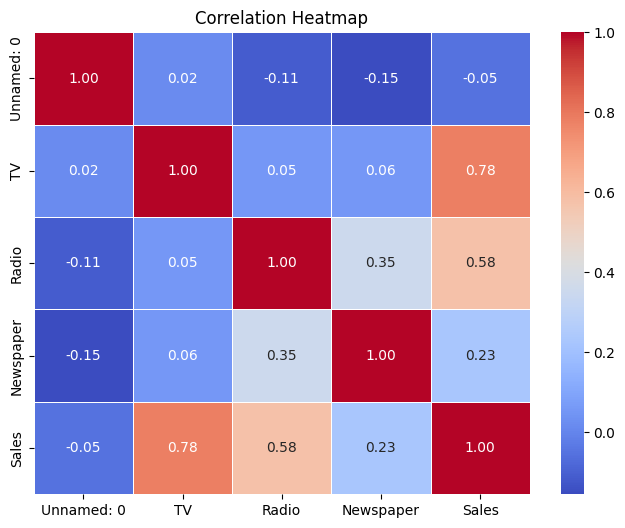

In [ ]:
#Data Visualization using Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(ds.corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
x = ds[['TV','Radio','Newspaper']] # Input features
y = ds['Sales'] # Target variable
#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# train the model
Model = RandomForestRegressor(n_estimators=100, random_state=42)
Model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
res=pd.DataFrame({
    'actual Sales': y_test.values,'predicted Sales':y_pre
})
print(res.head)

<bound method NDFrame.head of     actual Sales  predicted Sales
0           16.9           17.698
1           22.4           21.804
2           21.4           20.628
3            7.3            6.793
4           24.7           22.927
5           12.6           13.379
6           22.3           22.376
7            8.4            9.688
8           11.5           11.826
9           14.9           15.540
10           9.5            7.344
11           8.7            9.059
12          11.9           12.109
13           5.3            4.826
14          10.3           10.522
15          11.7           12.690
16           5.5            6.490
17          16.6           16.440
18          11.3           11.368
19          18.9           19.732
20          19.7           20.181
21          12.5           12.884
22          10.9           10.330
23          22.2           22.178
24           9.3            9.993
25           8.1            9.006
26          21.7           22.169
27          13.4  

In [ ]:
y_pre = Model.predict(x_test)
MSE = mean_squared_error(y_test, y_pre)
r2 =r2_score(y_test, y_pre)
print("\nModel Working")
print(f"Mean Squared Error :{MSE:.2f}")
print(f"R-Squared (R^2): {r2:.2f}")


Model Working
Mean Squared Error :0.59
R-Squared (R^2): 0.98
